#Mission 2
오전

1. ***VGG16 모델 만들기***
 - Sequential 방법으로 구성
 - Functional 방법으로 구성
 - Custom Model 방법으로 구성

오후
2. CIFAR-10 Dataset 사용
3. Test Data를 Validation Set으로 사용한다.
4. sgd optimizer를 사용
5. ReduceLROnPlateau 스케줄러 사용
6. Regularization 방법을 적용한다.
7. Validation Accuracy Score를 높여보자!

Optimizer, Loss, Metric에 주의!
초기 Epoch는 100

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Dropout

# Hyper Parameters

In [ ]:
NUM_CLASSES = 10
BATCH_SIZE = 512
EPOCHS = 50

# Data Handling

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 5,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

In [ ]:
train_gen = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE, shuffle=True)
valid_gen = valid_datagen.flow(X_test, y_test, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# print(y_train[INDEX])

In [ ]:
# INDEX = 0

# plt.imshow(X_train[INDEX])

# print(X_train[INDEX].shape)
# print(cifar10_labels[int(max(y_train[INDEX]))])

# Model Handling

In [ ]:
input = tf.keras.Input((32, 32, 3))
x = Conv2D(64, 3, padding='same', activation='relu')(input)
x = Conv2D(64, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(128, 3, padding='same', activation='relu')(x)
x = Conv2D(128, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(256, 3, padding='same', activation='relu')(x)
x = Conv2D(256, 3, padding='same', activation='relu')(x)
x = Conv2D(256, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

model = tf.keras.Model(input, output)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)        

# 학습

In [ ]:
SGD = tf.keras.optimizers.SGD(0.01)

In [ ]:
model.compile(optimizer=SGD, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, verbose=1,
                              patience=5, min_lr=0.001)

In [ ]:
history = model.fit(train_gen,
          epochs=EPOCHS,
          validation_data=valid_gen,
          callbacks=[reduce_lr])

Epoch 1/50
98/98 [==============================] - 27s 274ms/step - loss: 2.3015 - accuracy: 0.1096 - val_loss: 2.2998 - val_accuracy: 0.1257
Epoch 2/50
98/98 [==============================] - 26s 267ms/step - loss: 2.2982 - accuracy: 0.1389 - val_loss: 2.2955 - val_accuracy: 0.1692
Epoch 3/50
98/98 [==============================] - 26s 265ms/step - loss: 2.2921 - accuracy: 0.1621 - val_loss: 2.2858 - val_accuracy: 0.1746
Epoch 4/50
98/98 [==============================] - 26s 263ms/step - loss: 2.2749 - accuracy: 0.1698 - val_loss: 2.2519 - val_accuracy: 0.1727
Epoch 5/50
98/98 [==============================] - 26s 263ms/step - loss: 2.2132 - accuracy: 0.1850 - val_loss: 2.1294 - val_accuracy: 0.2183
Epoch 6/50
98/98 [==============================] - 25s 258ms/step - loss: 2.1453 - accuracy: 0.2005 - val_loss: 2.0539 - val_accuracy: 0.2603
Epoch 7/50
98/98 [==============================] - 25s 256ms/step - loss: 2.0948 - accuracy: 0.2212 - val_loss: 2.0510 - val_accuracy: 0.2557

In [ ]:
import matplotlib.pyplot as plt

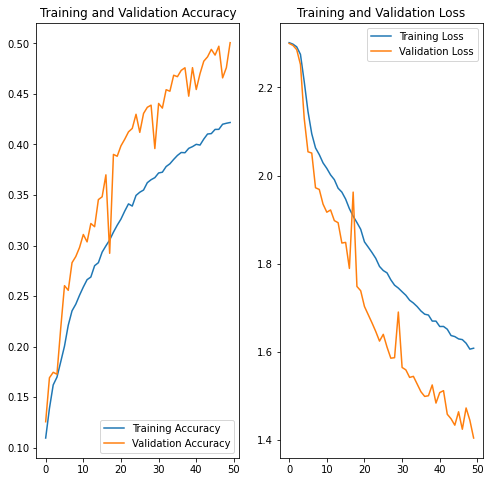

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# epochs_range = range(epochs)
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()